In [1]:
import xarray as xr
import numpy as np
from datetime import datetime, timedelta
import os
import sys
import pygrib
import glob

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature

In [2]:
states = cartopy.feature.NaturalEarthFeature(category='cultural',
                                            name='admin_1_states_provinces_lakes',
                                            scale='110m',
                                            facecolor='none')

In [3]:
st4Files = glob.glob("Stage 4/Data/ST4.*.06h")
st4List = sorted(st4Files)

print(st4List)

['Stage 4/Data\\ST4.2012041312.06h', 'Stage 4/Data\\ST4.2012041318.06h', 'Stage 4/Data\\ST4.2012041400.06h', 'Stage 4/Data\\ST4.2012041406.06h', 'Stage 4/Data\\ST4.2012041412.06h', 'Stage 4/Data\\ST4.2012041418.06h', 'Stage 4/Data\\ST4.2012041500.06h', 'Stage 4/Data\\ST4.2012041506.06h', 'Stage 4/Data\\ST4.2012041512.06h']


In [4]:
def grib_to_xs(grib, vName):
    vals = grib.values
    print(" - Converting GRIB to XArray of type " + str(type(vals)))
    if(np.ma.isMaskedArray(vals)):
        print(" -- Converting Masked Numpy Array to Standard Numpy Array")
        # Convert the masked array to a standard np array
        vals = np.ma.filled(vals, np.nan)
    
    arr = xr.DataArray(vals)
    arr = arr.astype('float32')
    arr = arr.rename({'dim_0':'lat', 'dim_1':'lon'})
    xs = arr.to_dataset(name=vName)
    
    return xs

In [15]:
fFirst = st4List[0]
gFile = pygrib.open(fFirst)  
subsel = gFile.select(level=0)

print(subsel)

gFile.close()

[1:Total Precipitation:kg m**-2 (accum):polar_stereographic:surface:level 0:fcst time 18-24 hrs (accum):from 201204121200]


In [14]:
lats = None
lons = None

for sFile in st4List:
    tS = sFile[-14:-4]
    
    gFile = pygrib.open(sFile)  
    subsel = gFile.select(level=0)

    if lats is None:
        for grb in gFile:
            lats, lons = grb.latlons()     
    
    ds = grib_to_xs(subsel[0], "accprc")
    ds["longitude"] = (('lat', 'lon'), lons)
    ds["latitude"] = (('lat', 'lon'), lats)
    
    ds.to_netcdf("Stage4_" + tS + ".nc")
    
    gFile.close()

 - Converting GRIB to XArray of type <class 'numpy.ma.core.MaskedArray'>
 -- Converting Masked Numpy Array to Standard Numpy Array
 - Converting GRIB to XArray of type <class 'numpy.ma.core.MaskedArray'>
 -- Converting Masked Numpy Array to Standard Numpy Array
 - Converting GRIB to XArray of type <class 'numpy.ma.core.MaskedArray'>
 -- Converting Masked Numpy Array to Standard Numpy Array
 - Converting GRIB to XArray of type <class 'numpy.ma.core.MaskedArray'>
 -- Converting Masked Numpy Array to Standard Numpy Array
 - Converting GRIB to XArray of type <class 'numpy.ma.core.MaskedArray'>
 -- Converting Masked Numpy Array to Standard Numpy Array
 - Converting GRIB to XArray of type <class 'numpy.ma.core.MaskedArray'>
 -- Converting Masked Numpy Array to Standard Numpy Array
 - Converting GRIB to XArray of type <class 'numpy.ma.core.MaskedArray'>
 -- Converting Masked Numpy Array to Standard Numpy Array
 - Converting GRIB to XArray of type <class 'numpy.ma.core.MaskedArray'>
 -- Conver

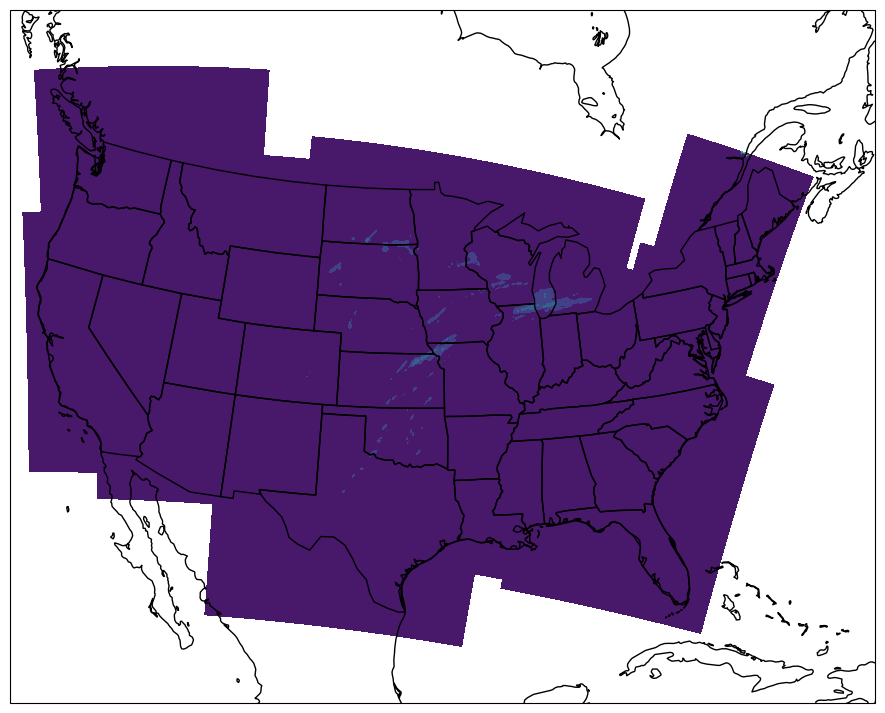

In [24]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes(projection=ccrs.LambertConformal())

ax.contourf(lons, lats, ds['accprc'], transform=ccrs.PlateCarree())

ax.add_feature(states, edgecolor='k')    
ax.coastlines()

plt.show()

In [17]:
FSS_THRESHS_PRECIP_PERCENTILES = [1, 5, 10, 25, 50, 75, 80, 90, 95, 99, 99.9, 99.99]

print(ds)
pct = np.nanpercentile(ds["accprc"].data, FSS_THRESHS_PRECIP_PERCENTILES)

print(FSS_THRESHS_PRECIP_PERCENTILES)
print(pct)

<xarray.Dataset>
Dimensions:    (lat: 881, lon: 1121)
Dimensions without coordinates: lat, lon
Data variables:
    accprc     (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    longitude  (lat, lon) float64 -119.0 -119.0 -119.0 ... -59.98 -59.94 -59.9
    latitude   (lat, lon) float64 23.12 23.12 23.13 23.14 ... 45.67 45.64 45.61
[1, 5, 10, 25, 50, 75, 80, 90, 95, 99, 99.9, 99.99]
[ 0.          0.          0.          0.          0.          0.
  0.          1.25        5.63000011 15.63000011 31.9777402  48.38000107]
